In [1]:
import nltk
nltk.download('book') #muchos libros en ingles cargados en la libreria ya tokenizado
from nltk.book import * #importa todo lo que tengo 
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

# Estadísticas básicas del lenguaje
Este documento muestra una visualización de las estadísticas básicas del lenguaje. Importamos NLTK, una librerías de python para la manipulación de lenguaje natural. Podemos ver que esta librería tiene contenido ya tokenizado de la siguiente forma:

In [2]:
text1 

<Text: Moby Dick by Herman Melville 1851>

Para ver los tokens usamos

In [3]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

La longitud del texto la podemos ver

In [4]:
print(len(text1))

260819


veamos algunas metricas del texto
una de ellas es la riqueza del texto rl
$$
rl=\frac{palabras unicas }{total}
$$



In [5]:
vocabulario=set(text1)#coge la lista de tokens y donde haya tokens repetidos no los toma en cuenta
#vocabulario esta en forma de diccionario
vocabulario= sorted(set(text1))

rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


Hecho esto, es fácil definir la función:

In [6]:
def riqueza_lexica(texto):
  vocabulario= sorted(set(texto))
  return  len(vocabulario)/len(texto)

Ahora la probamos en un texto diferente

In [7]:
print(text2)
riqueza_lexica(text2)

<Text: Sense and Sensibility by Jane Austen 1811>


0.04826383002768831

También el porcentaje de determinada palabra en un texto lo podemos estimar con la siguiente función:

In [8]:
def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)  

In [9]:
print(text1.count('Moby'))
porcentaje_palabra('god', text1)

84


0.007668153010325168

# Diccionarios

podemos hacer, en teoría, un diccionario


In [10]:
dic={}
for palabra in set(text1):
  dic[palabra]= text1.count(palabra)#este metodo tarda mucho
dic

{'cheapest': 1,
 'countries': 4,
 'gown': 1,
 'druggs': 1,
 'unbegotten': 1,
 'spots': 3,
 'snort': 1,
 'laugheth': 1,
 'Pannangians': 1,
 'moderate': 2,
 'intersecting': 1,
 'familiarly': 5,
 'totalities': 1,
 'disobeying': 1,
 'Cabin': 3,
 'y': 2,
 'WALW': 1,
 'salutation': 3,
 'mixes': 1,
 'suddenly': 45,
 'ruffles': 1,
 'spawned': 1,
 'questioning': 2,
 'hovers': 2,
 'navel': 2,
 'trained': 1,
 'discolour': 1,
 'holiday': 2,
 'lest': 7,
 'mainmast': 10,
 'tens': 3,
 'Very': 11,
 'temperance': 1,
 'live': 60,
 'brush': 1,
 'Israel': 1,
 'column': 5,
 'embayed': 1,
 'Gam': 1,
 'appellative': 2,
 'miserable': 8,
 'Hyena': 3,
 'prolongingly': 1,
 'Malay': 1,
 'Testament': 1,
 'diabolically': 1,
 'deacon': 1,
 'stomachs': 1,
 'Lashed': 1,
 'blows': 23,
 'spot': 23,
 'improvements': 2,
 'accommodate': 2,
 'touching': 45,
 'father': 16,
 'Throttling': 1,
 'whipped': 1,
 'belly': 9,
 'hurriedly': 2,
 'courts': 1,
 'fearful': 12,
 'glances': 7,
 'investigators': 1,
 'newly': 6,
 'branch': 4

Un método mejor para hacer un diccionario es de la siguiente manera (NLTK tiene una funcion util para esto):


In [12]:
fdist=FreqDist(text1)
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

Podemos graficar qué tan frecuentes son las palabras:

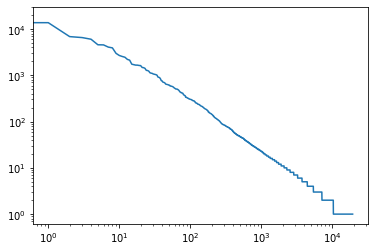

In [13]:
a=list(fdist.values())
a=np.array(a)
a=np.sort(a)
a=a[::-1]
plt.yscale('log')
plt.xscale('log')
plt.plot(a)

Filtrando la lista

In [14]:
palabras_largas=[palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado=sorted(set(palabras_largas))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Veamos una distribucion de palabras en esta nueva lista con el vocabulario filtrado hacemos una lista de tuplas



In [17]:
palabras_interesantes= [(palabra,fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10] 
len(palabras_interesantes)



957

In [18]:
#voy a convertir esto a numpy para ordenar

dtypes=[('word','S10'),('frequency',int)]

palabras_interesantes = np.array(palabras_interesantes,dtype=dtypes)
palabras_interesantes = np.sort(palabras_interesantes, order='frequency')

<function matplotlib.pyplot.show(close=None, block=None)>

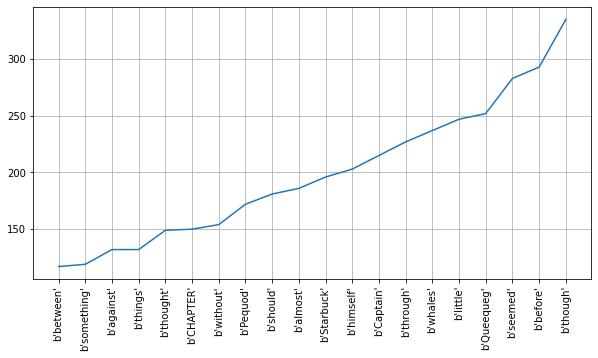

In [19]:
#grafiquemos
top_words=20

x=np.arange(len(palabras_interesantes[-top_words:]))
y=[freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize=(10,5))
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation= 'vertical')
plt.plot(x,y)
plt.grid(True)
plt.show

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1de1dad-9c4b-4f03-b453-defaa88f5f4e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>